In [16]:
import tensorflow_datasets as tfds
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
#  Load the IMDB movie review dataset
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Mirsaid\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteVQDIVR\imdb_reviews-tra…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Mirsaid\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteVQDIVR\imdb_reviews-tes…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Mirsaid\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteVQDIVR\imdb_reviews-uns…

Dataset imdb_reviews downloaded and prepared to C:\Users\Mirsaid\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='C:\\Users\\Mirsaid\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=()

In [10]:
# Take 2 training examples and print its contents
for example in imdb['train'].take(2):
  print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

In [11]:
train, test = imdb['train'], imdb['test']

x_train = []
y_train = []
x_test = []
y_test = []

for x, y in train:
  x_train.append(str(x.numpy().decode('utf-8')))
  y_train.append(y.numpy())
  
for x, y in test:    
  x_test.append(str(x.numpy().decode('utf-8')))
  y_test.append(y.numpy())

y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
# Parameters

vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "unknown"

In [17]:
# Tokenize the data
# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(x_train)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type)

In [24]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_3 (Flatten)         (None, 1920)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                122944    
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 283009 (1.08 MB)
Trainable params: 283009 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Train the model
epochs = 10

model.fit(padded, y_train, epochs=epochs, validation_data=(testing_padded, y_test))

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 0.4565 - accuracy: 0.7686 - val_loss: 0.3823 - val_accuracy: 0.8280
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1971 - accuracy: 0.9257 - val_loss: 0.4966 - val_accuracy: 0.7985
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0419 - accuracy: 0.9886 - val_loss: 0.7129 - val_accuracy: 0.7917
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0054 - accuracy: 0.9996 - val_loss: 0.8363 - val_accuracy: 0.8016
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 7.8581e-04 - accuracy: 1.0000 - val_loss: 0.9035 - val_accuracy: 0.8033
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 3.1342e-04 - accuracy: 1.0000 - val_loss: 0.9524 - val_accuracy: 0.8032
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 1.7147e-04 - accuracy: 1.0000 - val_loss: 0.9945 - val_accuracy: 0

In [27]:
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]
embedding_weights.shape

(10000, 16)

In [39]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word
tokenizer.index_word

{1861: 'unknown',
 2: 'the',
 3: 'and',
 4: 'a',
 5: 'of',
 6: 'to',
 7: 'is',
 8: 'br',
 9: 'in',
 10: 'it',
 11: 'i',
 12: 'this',
 13: 'that',
 14: 'was',
 15: 'as',
 16: 'for',
 17: 'with',
 18: 'movie',
 19: 'but',
 20: 'film',
 21: 'on',
 22: 'not',
 23: 'you',
 24: 'are',
 25: 'his',
 26: 'have',
 27: 'he',
 28: 'be',
 29: 'one',
 30: 'all',
 31: 'at',
 32: 'by',
 33: 'an',
 34: 'they',
 35: 'who',
 36: 'so',
 37: 'from',
 38: 'like',
 39: 'her',
 40: 'or',
 41: 'just',
 42: 'about',
 43: "it's",
 44: 'out',
 45: 'if',
 46: 'has',
 47: 'some',
 48: 'there',
 49: 'what',
 50: 'good',
 51: 'more',
 52: 'when',
 53: 'very',
 54: 'up',
 55: 'no',
 56: 'time',
 57: 'she',
 58: 'even',
 59: 'my',
 60: 'would',
 61: 'which',
 62: 'only',
 63: 'story',
 64: 'really',
 65: 'see',
 66: 'their',
 67: 'had',
 68: 'can',
 69: 'were',
 70: 'me',
 71: 'well',
 72: 'than',
 73: 'we',
 74: 'much',
 75: 'been',
 76: 'bad',
 77: 'get',
 78: 'will',
 79: 'do',
 80: 'also',
 81: 'into',
 82: 'people

In [40]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(2, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

### Tensorflow Embedding Projector

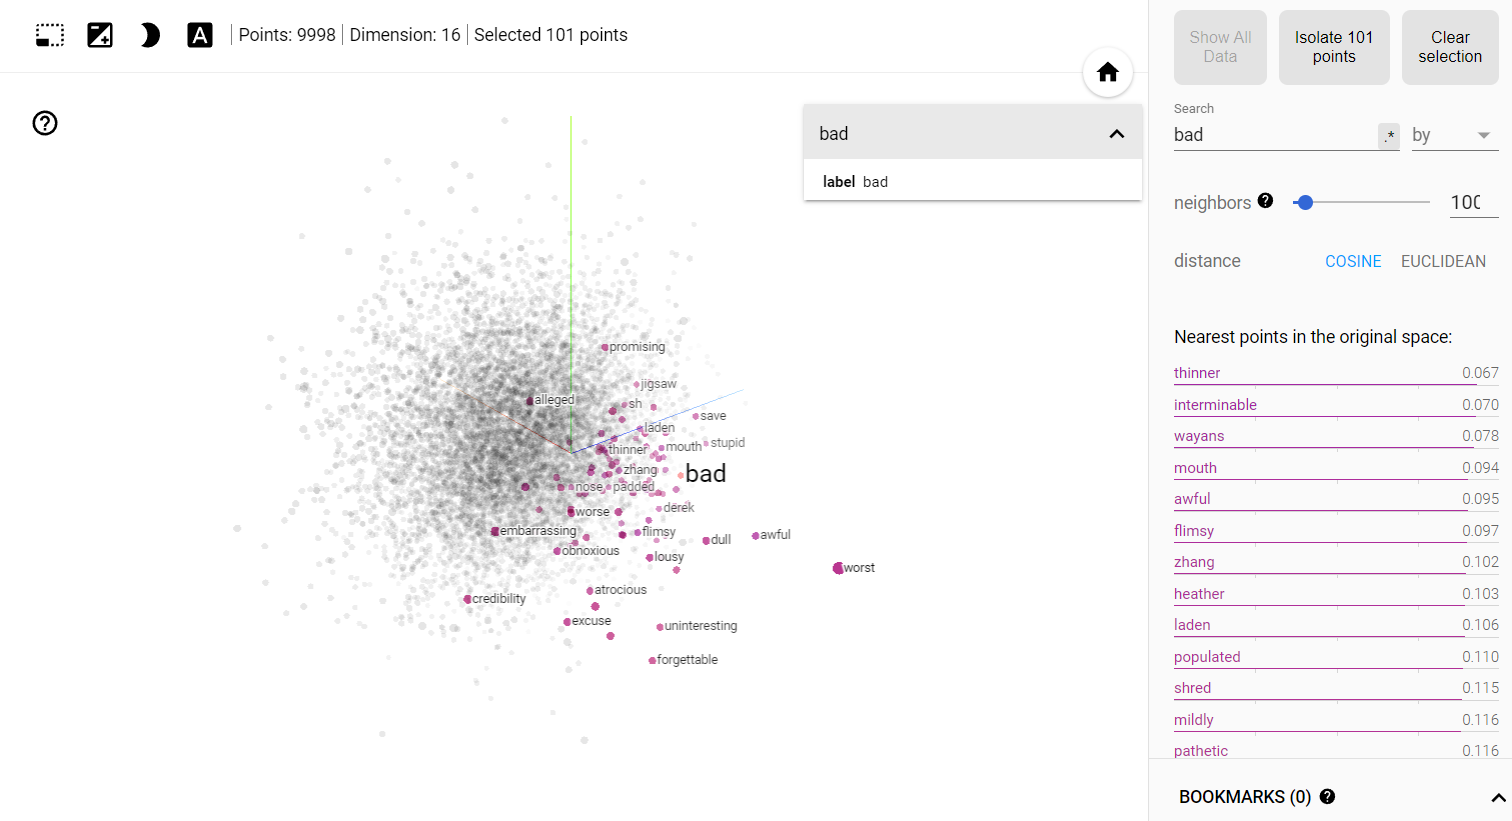